Q: 1) Delivery_time -> Predict delivery time using sorting time

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [97]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns 
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv('/Users/nihadnazar/Desktop/ASSIGNMENTS/DATASETS/delivery_time.csv')
print(df)

    Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


   DATA UNDERSTANDING
   
•Initial Analysis 

In [99]:
df.shape

(21, 2)

In [100]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [102]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [103]:
#RENAMING THE COLUMNS
df = df.rename(columns={'Delivery Time' : 'DELIVERY_TIME'})
df = df.rename(columns={'Sorting Time' : 'SORTING_TIME'})
df.head()

,DELIVERY_TIME,SORTING_TIME
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


• ASSUMPTION CHECK

1. LINEARITY CHECK

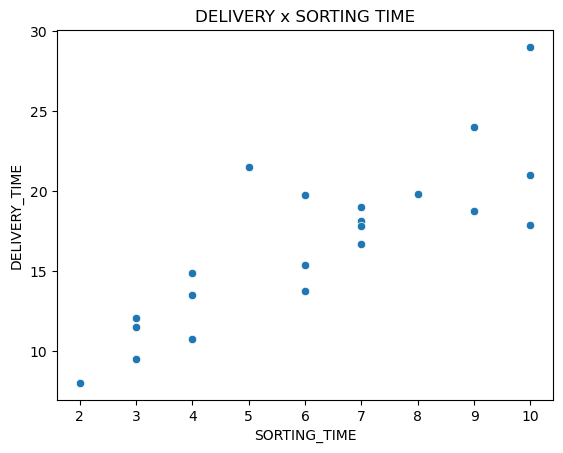

In [104]:
sns.scatterplot(x = 'SORTING_TIME',y='DELIVERY_TIME',data=df)
plt.title('DELIVERY x SORTING TIME')
plt.show()

2. NORMALITY TEST

HERE WE ARE USING THE DISTRIBUTION PLOTTING TECHNIQUE.

/var/folders/8s/_rqw5h_j02n6kdq9xprv4k9r0000gn/T/ipykernel_1096/2692494565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['SORTING_TIME'])


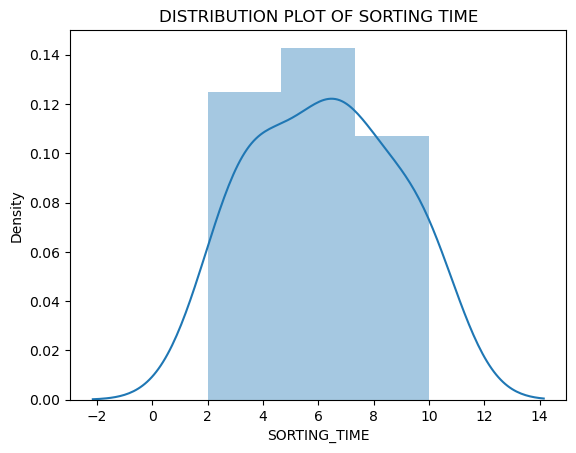

In [105]:
sns.distplot(a=df['SORTING_TIME'])
plt.title('DISTRIBUTION PLOT OF SORTING TIME')
plt.show()

In [106]:
df['SORTING_TIME'].skew()

0.047115474210530174

As we can see, the skewness is between 0 - 0.05, so we accept it.

3. MULTICOLINEARITY

In [107]:
#Here we use correlation matrix
df.corr()

,DELIVERY_TIME,SORTING_TIME
DELIVERY_TIME,1.000000,0.825997
SORTING_TIME,0.825997,1.000000


4. AUTO REGRESSION CHECK

SINCE HERE THERE IS NO TIME BASED INPUT, WE NEED NOT TO CHECK THE AUTO REGRESSION.


5. MODEL BUILDING

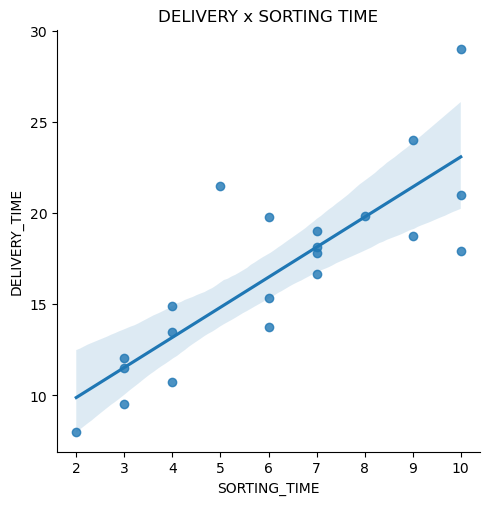

In [108]:
sns.lmplot(x = 'SORTING_TIME',y= 'DELIVERY_TIME',data = df)
plt.title('DELIVERY x SORTING TIME')
plt.show()

In [109]:
#As we can see the all points are not touching the linear line, it is not exactly linear.
model = smf.ols(formula='DELIVERY_TIME ~ SORTING_TIME',data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          DELIVERY_TIME   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        17:55:46   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
SORTING_TIME     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
model.params

Intercept       6.582734
SORTING_TIME    1.649020
dtype: float64

In [111]:
print('T VALUE OF THE MODEL IS: \n',model.tvalues,'\n\nP VALUE OF THE MODEL IS: \n',model.pvalues)

T VALUE OF THE MODEL IS: 
 Intercept       3.823349
SORTING_TIME    6.387447
dtype: float64 

P VALUE OF THE MODEL IS: 
 Intercept       0.001147
SORTING_TIME    0.000004
dtype: float64


In [112]:
print('R SQUARED VALUE:',model.rsquared,'\nADJACENT R SQUARED VALUE: ',model.rsquared_adj)

R SQUARED VALUE: 0.6822714748417231 
ADJUSTED R SQUARED VALUE:  0.6655489208860244


6. MODEL TESTING

Manual calculation

In [113]:
# The formula for manual calculation is:
# y = mx+c, WHERE c is the intercept constant, m is the sorting time parameter value, x is the sorting time
# if x is 15
y = (1.649020*15)+6.582734
print(y,'is the delivery time taken if the sorting time is 15.')

31.318033999999997 is the delivery time taken if the sorting time is 15.


In [114]:
# if x = 12
y = (1.649020*12)+6.582734
print(y,'is the delivery time taken when the sorting time is 12.')

26.370973999999997 is the delivery time taken when the sorting time is 12.


BY MACHINE PREDICTION.

In [115]:
new_df = pd.Series([11,15,17])
new_pred_df = pd.DataFrame(new_df,columns = ['SORTING_TIME'])
new_pred_df

,SORTING_TIME
0,11
1,15
2,17


In [116]:
model.predict(new_pred_df)

0    24.721953
1    31.318032
2    34.616072
dtype: float64

THEREFORE THE MODEL PREDICTED THAT:

• FOR 11 MINUTES OF SORTING TIME, WE NEED 24 MINUTES TO DELIVER.

• FOR 15 MINUTES OF SORTING TIME, WE NEED 31 MINUTES TO DELIVER.

• FOR 17 MINUTES OF SORTING TIME, WE NEED 34 MINUTES TO DELIVER.

7. APPLYING TRANSFORMATIONS TO THE DATASET. (TO MAKE DATA MORE LINEAR)

In [117]:
#USING STANDARD SCALAR
x = df.copy()
x

,DELIVERY_TIME,SORTING_TIME
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [118]:
x_input = x[['SORTING_TIME']]
x_input

,SORTING_TIME
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [142]:
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()
scaled_sorting_time = std_scalar.fit_transform((x_input))
scaled_sorting_time

array([[ 1.53562462],
       [-0.88298415],
       [-0.07678123],
       [ 1.13252315],
       [ 1.53562462],
       [-0.07678123],
       [ 0.32632023],
       [-1.28608562],
       [ 1.53562462],
       [ 1.13252315],
       [ 0.72942169],
       [-0.88298415],
       [ 0.32632023],
       [-1.28608562],
       [-1.28608562],
       [-0.88298415],
       [-0.07678123],
       [ 0.32632023],
       [-1.68918708],
       [ 0.32632023],
       [-0.47988269]])

In [143]:
x['STANDARD_SORT_TIME'] = scaled_sorting_time
x['LOG_SORT_TIME'] = np.log(x['SORTING_TIME'])
x['SQRT_SORT_TIME'] = np.sqrt(x['SORTING_TIME'])
x['EXP_SORT_TIME'] = np.exp(x['SORTING_TIME'])
x['CUBERT_SORT_TIME'] = np.cbrt(x['SORTING_TIME'])

x

,DELIVERY_TIME,SORTING_TIME,STANDARD_SORT_TIME,LOG_SORT_TIME,SQRT_SORT_TIME,EXP_SORT_TIME,CUBERT_SORT_TIME
0,21.00,10,1.535625,2.302585,3.162278,22026.465795,2.154435
1,13.50,4,-0.882984,1.386294,2.000000,54.598150,1.587401
2,19.75,6,-0.076781,1.791759,2.449490,403.428793,1.817121
3,24.00,9,1.132523,2.197225,3.000000,8103.083928,2.080084
4,29.00,10,1.535625,2.302585,3.162278,22026.465795,2.154435
5,15.35,6,-0.076781,1.791759,2.449490,403.428793,1.817121
6,19.00,7,0.326320,1.945910,2.645751,1096.633158,1.912931
7,9.50,3,-1.286086,1.098612,1.732051,20.085537,1.442250
8,17.90,10,1.535625,2.302585,3.162278,22026.465795,2.154435
9,18.75,9,1.132523,2.197225,3.000000,8103.083928,2.080084


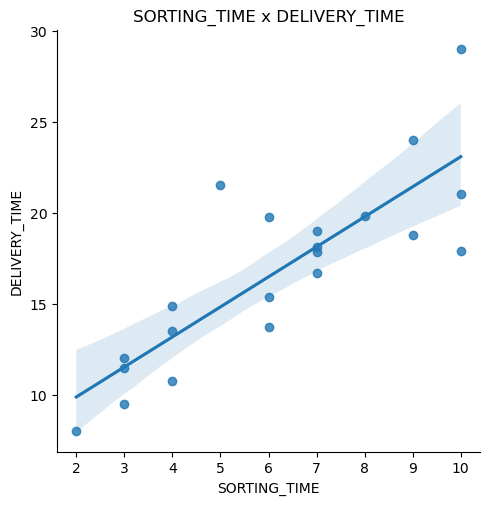

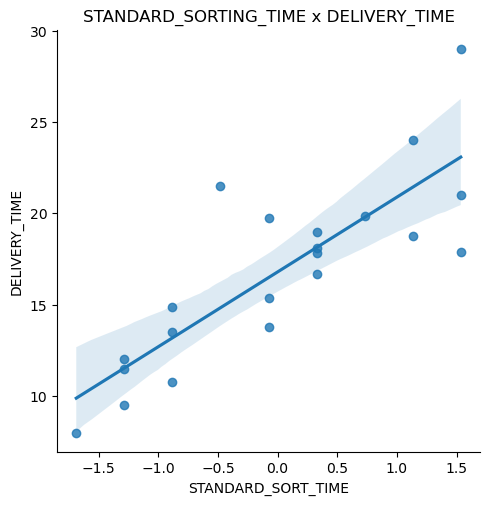

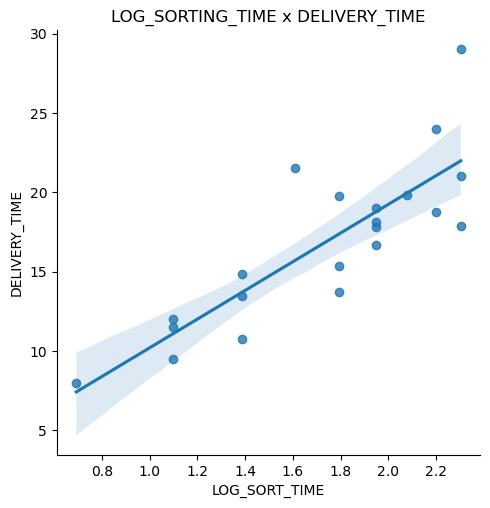

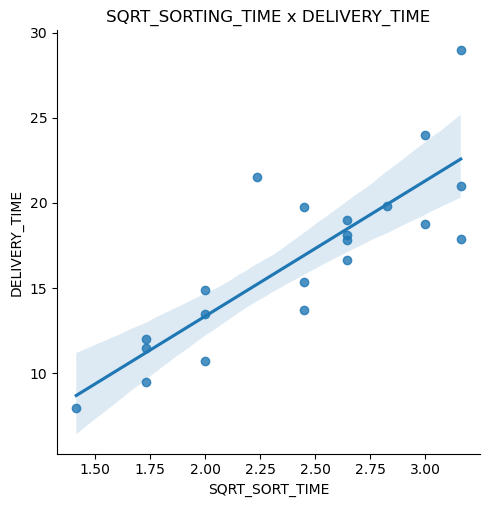

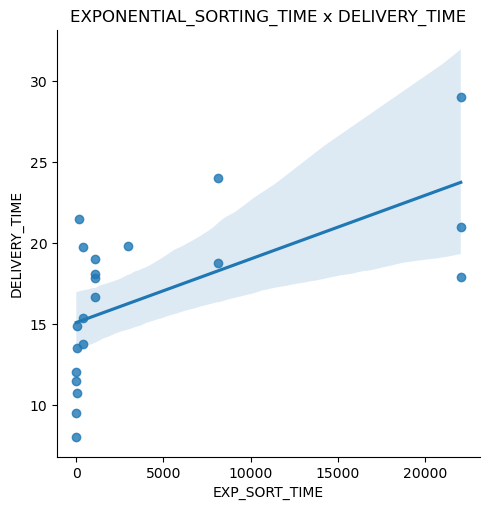

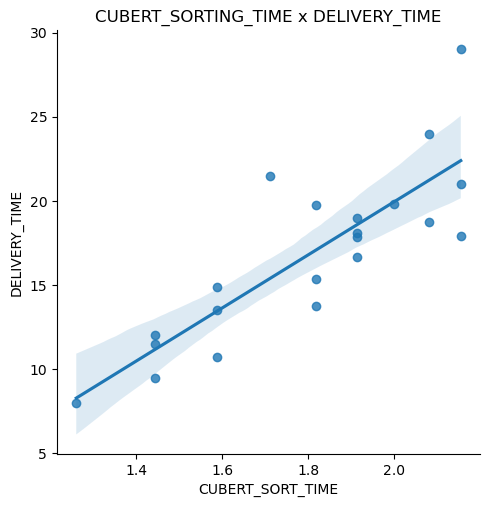

In [144]:
sns.lmplot(x='SORTING_TIME',y='DELIVERY_TIME',data = x)
plt.title('SORTING_TIME x DELIVERY_TIME')

sns.lmplot(x='STANDARD_SORT_TIME',y='DELIVERY_TIME',data = x)
plt.title('STANDARD_SORTING_TIME x DELIVERY_TIME')
plt.show()

sns.lmplot(x='LOG_SORT_TIME',y='DELIVERY_TIME',data = x)
plt.title('LOG_SORTING_TIME x DELIVERY_TIME')
plt.show()

sns.lmplot(x='SQRT_SORT_TIME',y='DELIVERY_TIME',data = x)
plt.title('SQRT_SORTING_TIME x DELIVERY_TIME')
plt.show()

sns.lmplot(x='EXP_SORT_TIME',y='DELIVERY_TIME',data = x)
plt.title('EXPONENTIAL_SORTING_TIME x DELIVERY_TIME')
plt.show()

sns.lmplot(x='CUBERT_SORT_TIME',y='DELIVERY_TIME',data = x)
plt.title('CUBERT_SORTING_TIME x DELIVERY_TIME')
plt.show()

MODEL BUILDING USING STATSMODEL DELIVERY TIME AND STANDARD SORT TIME.

In [122]:
model_1 = smf.ols(formula='DELIVERY_TIME ~ STANDARD_SORT_TIME',data=x).fit()
print('R SQUARE OF STANDARD SORT TIME: ',round(model_1.rsquared,4))
print('ADJUSTED R SQUARE OF STANDARD SORT_TIME: ',round(model_1.rsquared_adj,4))
print('AKAIKE SCORE OF STANDARD SORT TIME IS: ',round(model_1.aic,4))
print('BAYESIAN SCORE OF STANDARD SORT TIME IS: ',round(model_1.bic,4))

R SQUARE OF STANDARD SORT TIME:  0.6823
ADJUSTED R SQUARE OF STANDARD SORT_TIME:  0.6655
AKAIKE SCORE OF STANDARD SORT TIME IS:  106.714
BAYESIAN SCORE OF STANDARD SORT TIME IS:  108.803


MODEL BUILDING USING STATSMODEL DELIVERY TIME AND LOG SORT TIME.

In [123]:
model_2 = smf.ols(formula='DELIVERY_TIME ~ LOG_SORT_TIME',data=x).fit()
print('R SQUARE OF LOG SORT TIME: ',round(model_2.rsquared,4))
print('ADJUSTED R SQUARE OF LOG SORT_TIME: ',round(model_2.rsquared_adj,4))
print('AKAIKE SCORE OF LOG SORT TIME IS: ',round(model_2.aic,4))
print('BAYESIAN SCORE OF LOG SORT TIME IS: ',round(model_2.bic,4))

R SQUARE OF LOG SORT TIME:  0.6954
ADJUSTED R SQUARE OF LOG SORT_TIME:  0.6794
AKAIKE SCORE OF LOG SORT TIME IS:  105.8248
BAYESIAN SCORE OF LOG SORT TIME IS:  107.9139


MODEL BUILDING USING STATSMODEL DELIVERY TIME AND SQUARE ROOT SORT TIME.

In [124]:
model_3 = smf.ols(formula='DELIVERY_TIME ~ SQRT_SORT_TIME',data=x).fit()
print('R SQUARE OF SQRT SORT TIME: ',round(model_3.rsquared,4))
print('ADJUSTED R SQUARE OF SQRT SORT_TIME: ',round(model_3.rsquared_adj,4))
print('AKAIKE SCORE OF SQRT SORT TIME IS: ',round(model_3.aic,4))
print('BAYESIAN SCORE OF SQRT SORT TIME IS: ',round(model_3.bic,4))

R SQUARE OF SQRT SORT TIME:  0.6958
ADJUSTED R SQUARE OF SQRT SORT_TIME:  0.6798
AKAIKE SCORE OF SQRT SORT TIME IS:  105.7998
BAYESIAN SCORE OF SQRT SORT TIME IS:  107.8889


MODEL BUILDING USING STATSMODEL DELIVERY TIME AND EXPONENTIAL SORT TIME.

In [125]:
model_4 = smf.ols(formula='DELIVERY_TIME ~ EXP_SORT_TIME',data=x).fit()
print('R SQUARE OF EXP SORT TIME: ',round(model_4.rsquared,4))
print('ADJUSTED R SQUARE OF EXP SORT_TIME: ',round(model_4.rsquared_adj,4))
print('AKAIKE SCORE OF EXP SORT TIME IS: ',round(model_4.aic,4))
print('BAYESIAN SCORE OF EXP SORT TIME IS: ',round(model_4.bic,4))

R SQUARE OF EXP SORT TIME:  0.3611
ADJUSTED R SQUARE OF EXP SORT_TIME:  0.3275
AKAIKE SCORE OF EXP SORT TIME IS:  121.383
BAYESIAN SCORE OF EXP SORT TIME IS:  123.472


MODEL BUILDING USING STATSMODEL DELIVERY TIME AND CUBIC ROOT SORT TIME.

In [126]:
model_5 = smf.ols(formula='DELIVERY_TIME ~ CUBERT_SORT_TIME',data=x).fit()
print('R SQUARE OF CUBERT SORT TIME: ',round(model_5.rsquared,4))
print('ADJUSTED R SQUARE OF CUBERT SORT_TIME: ',round(model_5.rsquared_adj,4))
print('AKAIKE SCORE OF CUBERT SORT TIME IS: ',round(model_5.aic,4))
print('BAYESIAN SCORE OF CUBERT SORT TIME IS: ',round(model_5.bic,4))

R SQUARE OF CUBERT SORT TIME:  0.6974
ADJUSTED R SQUARE OF CUBERT SORT_TIME:  0.6815
AKAIKE SCORE OF CUBERT SORT TIME IS:  105.6882
BAYESIAN SCORE OF CUBERT SORT TIME IS:  107.7773


HERE WE CAN CONFIRM THE MODEL USING THE CUBE ROOT AS THE BEST MODEL BECAUSE OF:

•R SQUARE AND ADJUSTED R SQUARED IS HIGHER COMPARITIVELY HIGHER.

•BOTH AIC AND BIC VALUES ARE LOWER COMPARED TO OTHER MODEL.

•HENCE WE TAKE THE CUBIC ROOT MODEL I.E MODEL 3 FOR PREDICTION. 

In [138]:
new_data = new_df.copy()
new_pred_data = pd.DataFrame(new_data,columns=['SORTING_TIME'])
new_pred_data

,SORTING_TIME
0,11
1,15
2,17


In [139]:
new_pred_data['CUBERT_SORT_TIME'] = np.cbrt(new_pred_data['SORTING_TIME'])
new_pred_data

,SORTING_TIME,CUBERT_SORT_TIME
0,11,2.223980
1,15,2.466212
2,17,2.571282


In [140]:
model_5.predict(new_pred_data)

0    23.486923
1    27.306264
2    28.962925
dtype: float64

CONCLUSION:
    
• IN OUR FIRST MODEL WE GOT 24 MIN APPROX FOR 11 MINUTE OF SORTING TIME, BUT OUR BEST MODEL PREDICTED APPROXIMATELY   23 MINUTES OF DELIVERY TIME.
    
• IN OUR FIRST MODEL WE GOT 31 MIN APPROX FOR 15 MINUTE OF SORTING TIME, BUT OUR BEST MODEL PREDICTED APPROXIMATELY   27 MINUTES OF DELIVERY TIME.
    
• IN OUR FIRST MODEL WE GOT 34 MIN APPROX FOR 17 MINUTE OF SORTING TIME, BUT OUR BEST MODEL PREDICTED APPROXIMATELY   28 MINUTES OF DELIVERY TIME.